<a href="https://colab.research.google.com/github/wilberquito/Thesis/blob/main/MelanomaClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melanoma classifier with Pytorch


In [1]:
import requests
from pathlib import Path
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

try:
    import google.colab
    from google.colab import drive
    IN_COLAB = True
    drive.mount('/content/drive')
except:
    IN_COLAB = False

print(f"In colab: {IN_COLAB}")

Mounted at /content/drive
In colab: True


In [ ]:
def pull_data():
  print("Unzipping the data from google drive")
  !unzip ./drive/MyDrive/data.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_data() 

Unzipping the data from google drive


In [2]:
def pull_code():
  print("Unzipping the code from google drive")
  !unzip ./drive/MyDrive/modular.zip -d . >/dev/null 2>&1

if IN_COLAB:
    pull_code() 

Unzipping the code from google drive


## Load data using source code

In [4]:
import modular.dataset as m_dataset

In [5]:
data_dir = 'data.etl'
data_folder = '512'

train_df, test_df, mapping = m_dataset.get_df(data_dir,
                                              data_folder)

FileNotFoundError: ignored

## Exploratory data analysis

### 2020-2021 data

In [ ]:
path = Path(f'./data/jpeg-melanoma-{512}x{512}/train.csv')
df = pd.read_csv(path)
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000


In [ ]:
df.shape

(33126, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
 8   tfrecord                       33126 non-null  int64  
 9   width                          33126 non-null  int64  
 10  height                         33126 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.8+ MB


In [ ]:
df.describe()

#### Diagnosis

Here I notice that the are a lot of `unknown` diagnosis. 

There are also few examples of `solar lentigo`, `cafe-au-lait macule` and `atypical melanocytic proliferation`. 

In [ ]:
diagnosis_freq = df['diagnosis'].value_counts()
diagnosis_freq

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

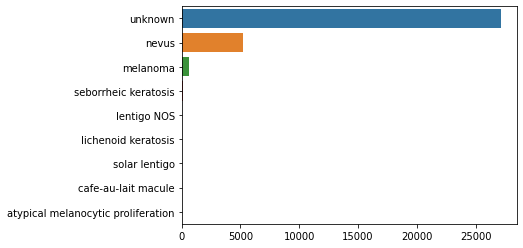

In [ ]:
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

#### TfRecord

`tfrecord` can be labeled as `-1`, which means that they don't know exactly which values is. This samples may be droped.

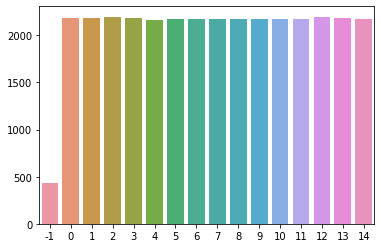

In [ ]:
tfrecord_freq = df['tfrecord'].value_counts()
_ = sns.barplot(y=tfrecord_freq.values, x=tfrecord_freq.index)

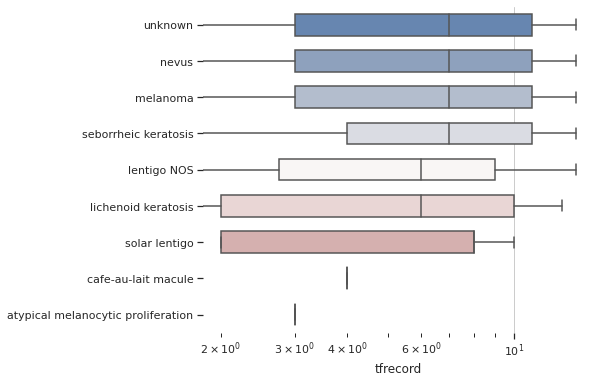

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="tfrecord", y="diagnosis", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 2019 data

In [ ]:
size = 512
path = Path(f'./data/jpeg-isic2019-{size}x{size}/train.csv')
df = pd.read_csv(path)
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     25331 non-null  object 
 1   patient_id                     25331 non-null  int64  
 2   sex                            25331 non-null  object 
 3   age_approx                     24894 non-null  float64
 4   anatom_site_general_challenge  22700 non-null  object 
 5   diagnosis                      25331 non-null  object 
 6   benign_malignant               25331 non-null  object 
 7   target                         25331 non-null  int64  
 8   tfrecord                       25331 non-null  int64  
 9   width                          25331 non-null  int64  
 10  height                         25331 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.1+ MB


In [ ]:
df.describe()

,patient_id,age_approx,target,tfrecord,width,height
count,25331.0,24894.000000,25331.000000,25331.000000,25331.000000,25331.000000
mean,-1.0,54.028481,0.178516,14.445146,854.896648,760.816075
std,0.0,18.130971,0.382954,8.672814,206.942272,269.722902
min,-1.0,0.000000,0.000000,-1.000000,576.000000,450.000000
25%,-1.0,40.000000,0.000000,7.000000,600.000000,450.000000
50%,-1.0,55.000000,0.000000,14.000000,1024.000000,768.000000
75%,-1.0,70.000000,0.000000,22.000000,1024.000000,1024.000000
max,-1.0,85.000000,1.000000,29.000000,1024.000000,1024.000000


In [ ]:
df.shape

(25331, 11)

#### Diagnosis

The way they represent the diagnosis is different from 2020-2021 data. I need a map to join them toguether. I can use the description from the website challenge to know which tag is each one https://challenge.isic-archive.com/landing/2019/

Here there is something interesting thougth, there are less samples in the 2019 dataset but, there relatively more samples of melanoma than last 2020-2021 data.

In [ ]:
diagnosis_freq = df['diagnosis'].value_counts()
diagnosis_freq

NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: diagnosis, dtype: int64

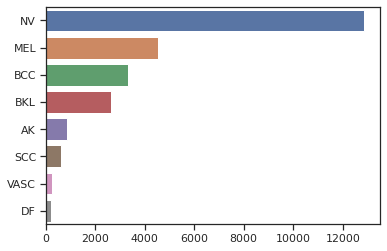

In [ ]:
_ = sns.barplot(x=diagnosis_freq.values, y=diagnosis_freq.index)

Here I can notice that there are the same number of malignant of samples than MEL diagnosis. Is that a coincidence? let's see.

In [ ]:
benign_malignant = df['benign_malignant'].value_counts()
benign_malignant

benign       20809
malignant     4522
Name: benign_malignant, dtype: int64

In [ ]:
tmp = df.groupby(by=['diagnosis', 'benign_malignant'], 
           as_index=False).count()
tmp

,diagnosis,benign_malignant,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target,tfrecord,width,height
0,AK,benign,867,867,867,864,845,867,867,867,867
1,BCC,benign,3323,3323,3323,3317,3251,3323,3323,3323,3323
2,BKL,benign,2624,2624,2624,2598,2349,2624,2624,2624,2624
3,DF,benign,239,239,239,239,235,239,239,239,239
4,MEL,malignant,4522,4522,4522,4437,4395,4522,4522,4522,4522
5,NV,benign,12875,12875,12875,12558,10781,12875,12875,12875,12875
6,SCC,benign,628,628,628,628,622,628,628,628,628
7,VASC,benign,253,253,253,253,222,253,253,253,253


Clearly, when it's a malignant cancer if only if diagnosis is labeled as `MEL`, which is melanoma.

In [ ]:
pivot_table = tmp.pivot(index='diagnosis', columns='benign_malignant', values='sex')
pivot_table = pivot_table.fillna(0)
pivot_table

benign_malignant,benign,malignant
diagnosis,,
AK,867.0,0.0
BCC,3323.0,0.0
BKL,2624.0,0.0
DF,239.0,0.0
MEL,0.0,4522.0
NV,12875.0,0.0
SCC,628.0,0.0
VASC,253.0,0.0


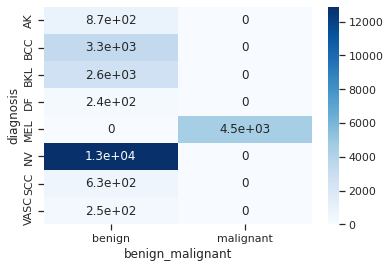

In [ ]:
_ = sns.heatmap(pivot_table, annot=True, cmap='Blues')

### Explaratory data analysis of the hole dataset

In [ ]:
from vicorobot.dataset import get_df

In [ ]:
out_dim = 8
base_img_size = 512
data_dir = Path('data/')
train_df, test_df, meta_features, n_meta_features, mel_idx = get_df(kernel_type=None,
                                                                    out_dim=out_dim, 
                                                                    data_dir=data_dir, 
                                                                    data_folder=str(base_img_size),
                                                                    use_meta=False)
train_df.shape, test_df.shape, mel_idx

((31265, 14), (10982, 8), 6)

In [ ]:
train_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,filepath,fold,is_ext
0,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,7,6,1872,1053,data/jpeg-melanoma-512x512/train/ISIC_0052212.jpg,6,0
1,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,7,10,1872,1053,data/jpeg-melanoma-512x512/train/ISIC_0076995.jpg,10,0
2,ISIC_0084086,IP_4023055,male,60.0,lower extremity,nevus,benign,7,12,1872,1053,data/jpeg-melanoma-512x512/train/ISIC_0084086.jpg,12,0
3,ISIC_0084270,IP_2961528,male,40.0,lower extremity,nevus,benign,7,1,1872,1053,data/jpeg-melanoma-512x512/train/ISIC_0084270.jpg,1,0
4,ISIC_0084395,IP_0175539,female,45.0,torso,nevus,benign,7,3,1872,1053,data/jpeg-melanoma-512x512/train/ISIC_0084395.jpg,3,0


In [ ]:
test_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,width,height,filepath
0,ISIC_0052060,IP_3579794,male,70.0,NaN,6000,4000,data/jpeg-melanoma-512x512/test/ISIC_0052060.jpg
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity,6000,4000,data/jpeg-melanoma-512x512/test/ISIC_0052349.jpg
2,ISIC_0058510,IP_7960270,female,55.0,torso,6000,4000,data/jpeg-melanoma-512x512/test/ISIC_0058510.jpg
3,ISIC_0073313,IP_6375035,female,50.0,torso,6000,4000,data/jpeg-melanoma-512x512/test/ISIC_0073313.jpg
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity,1920,1080,data/jpeg-melanoma-512x512/test/ISIC_0073502.jpg


The variable mel_idx represents the identification of melanoma in the target column in train dataframe.

In [ ]:
mel_idx

6

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57964 entries, 0 to 57963
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     57964 non-null  object 
 1   patient_id                     57964 non-null  object 
 2   sex                            57923 non-null  object 
 3   age_approx                     57483 non-null  float64
 4   anatom_site_general_challenge  54822 non-null  object 
 5   diagnosis                      57964 non-null  object 
 6   benign_malignant               57964 non-null  object 
 7   target                         57964 non-null  int64  
 8   tfrecord                       57964 non-null  int64  
 9   width                          57964 non-null  int64  
 10  height                         57964 non-null  int64  
 11  filepath                       57964 non-null  object 
 12  fold                           57964 non-null 

In [ ]:
train_df.describe()

,age_approx,target,tfrecord,width,height,fold,is_ext
count,57483.000000,57964.000000,57964.000000,57964.000000,57964.000000,32692.000000,57964.000000
mean,51.063619,8.340867,10.261559,2636.673366,1832.925195,6.999633,0.435995
std,16.322199,2.806952,7.545506,2232.861787,1444.765241,4.323636,0.495891
min,0.000000,0.000000,0.000000,576.000000,450.000000,0.000000,0.000000
25%,40.000000,9.000000,4.000000,1024.000000,680.000000,3.000000,0.000000
50%,50.000000,9.000000,9.000000,1024.000000,1024.000000,7.000000,0.000000
75%,65.000000,10.000000,14.000000,5184.000000,3456.000000,11.000000,1.000000
max,90.000000,10.000000,29.000000,6000.000000,6000.000000,14.000000,1.000000


In [ ]:
diagnosis_freq = train_df['diagnosis'].value_counts()
diagnosis_freq

nevus       18031
melanoma     5090
BCC          3320
BKL          2837
AK            867
SCC           628
VASC          253
DF            239
Name: diagnosis, dtype: int64

In [ ]:
target_freq = train_df['target'].value_counts()
target_freq

7    18031
6     5090
1     3320
2     2837
0      867
4      628
5      253
3      239
Name: target, dtype: int64

In [ ]:
malignant_freq = train_df['benign_malignant'].value_counts()
malignant_freq

benign       52874
malignant     5090
Name: benign_malignant, dtype: int64

In [ ]:
test_df['filepath'][0]

PosixPath('/content/data/jpeg-melanoma-1024x1024/test/ISIC_0052060.jpg')

Checking the mapping between diagnosis and target

In [ ]:
train_df[['diagnosis', 'target']].drop_duplicates()

,diagnosis,target
0,nevus,7
17,melanoma,6
37,BKL,2
8888,DF,3
8899,SCC,4
8901,BCC,1
8939,VASC,5
9037,AK,0


### Sample visualization

To have a notion about the images I deal with I print a subset of them, todo that I first need dataset from the dataframe problem.

In [ ]:
train_dataset = MelanomaDataset(train_df, 'train')
len(train_dataset), len(train_df)

(57964, 57964)

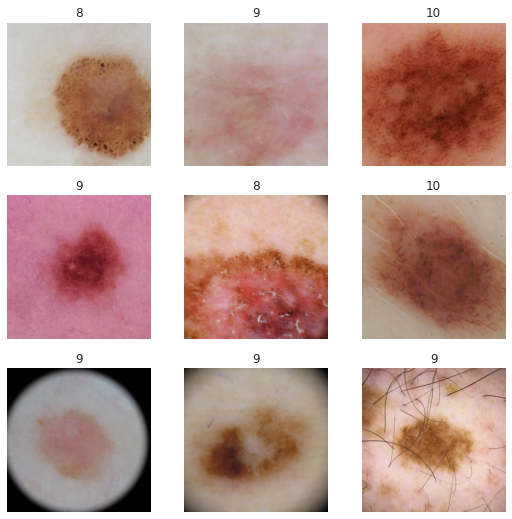

In [ ]:
plot_dataset_samples(train_dataset, 3, 3)

## Show the arquitecture nets

Here I show the EffNet, ResNet and ConvNext.

In [ ]:
!pip install torchinfo

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/commands/__init__.py", line 109, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.9/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_fram

In [ ]:
import torch
from torchinfo import summary
from modular.models import Effnet_Melanoma,   \
                           Resnest_Melanoma,  \
                           ConvNext_Melanoma, \
                           get_input_size

ModuleNotFoundError: ignored

In [ ]:
out_dim = 8

### EffNet Melanoma

In [ ]:
effnet_nn = Effnet_Melanoma(out_dim)
img_size = 600
summary(model=effnet_nn, 
        input_size=(32, 3, img_size, img_size), # make sure this is "input_size", not "input_shape"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

### Resnet Melanoma

In [ ]:
resnet_nn = Resnest_Melanoma(out_dim)
img_size = 232 
summary(model=resnet_nn, 
        input_size=(32, 3, img_size, img_size), # make sure this is "input_size", not "input_shape"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

### ConvNext Melanoma

In [ ]:
convnext_nn = ConvNext_Melanoma(out_dim)
img_size = 232
summary(model=resnet_nn, 
        input_size=(32, 3, img_size, img_size), # make sure this is "input_size", not "input_shape"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

## Train

In this section I train the models seen in the previous section

### Effnet Melanoma

In [ ]:
import torch
from modular.dataset import MelanomaDataset, get_df, get_transforms
from modular.engine import train
from modular.models import Effnet_Melanoma

In [ ]:
epochs = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'

n_classes = 8
effnet_nn = Effnet_Melanoma(n_classes)
effnet_img_size = 600

learning_rate = 0.001
optimizer = torch.optim.Adam(params=effnet_nn.parameters(),
                             lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

train_transforms, test_transforms = get_transforms(effnet_img_size)

data_dir = Path('/content/data/')
base_img_size = 1024
train_df, test_df, mel_idx = get_df(out_dim=n_classes, 
                                    data_dir=data_dir, 
                                    data_folder=str(base_img_size))

train_dataset = MelanomaDataset(csv=train_df,
                                mode='train',
                                transform=train_transforms)             
test_dataset  = MelanomaDataset(csv=test_df,
                                mode='test',
                                transform=test_transforms)             

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

Let's check the optimizer

In [ ]:
optimizer

In [ ]:
criterion

In [ ]:
print(f'Samples to train {len(train_loader)}, Samples to test {len(test_loader)}')

In [ ]:
print('Powered by GPU' if device == 'cuda' else 'Powered by CPU')

In [ ]:
results = train(effnet_nn,
                train_loader,
                test_loader,
                optimizer,
                criterion,
                epochs,
                device)